findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

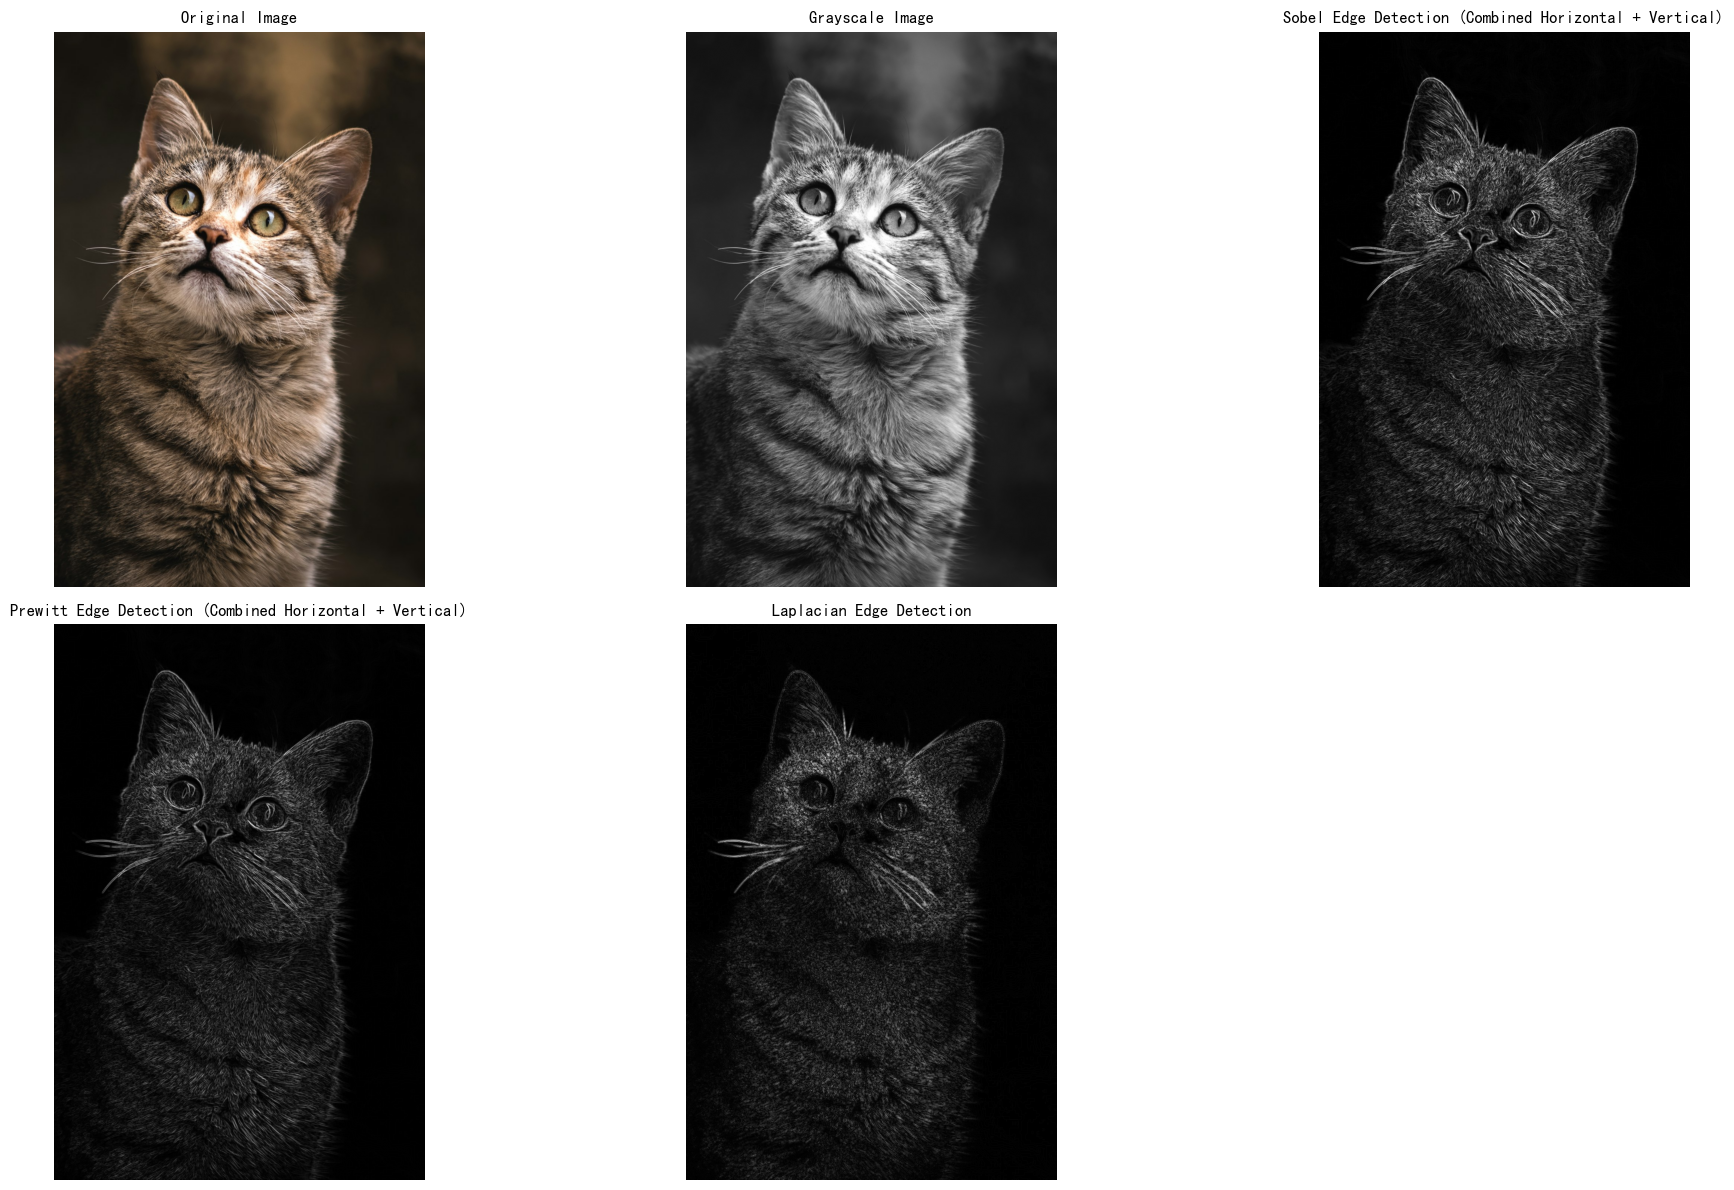

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def load_image(image_path):
    """Load an image and convert it to RGB format"""
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Could not read the image: {image_path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


def preprocess_image(image):
    """Preprocessing: Convert to grayscale (edge detection typically uses single-channel grayscale)"""
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Optional: Add Gaussian blur to reduce noise (edge detection is noise-sensitive)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)  # 3x3 Gaussian kernel, sigma=0 (auto-calculated)
    return gray, blurred


def sobel_edge_detection(gray):
    """
    Sobel Edge Detection: Detects edges by calculating horizontal and vertical gradients
    Feature: Moderate noise suppression, accurate edge localization
    """
    # Calculate x-direction gradient (horizontal edges): dx=1, dy=0
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # CV_64F supports negative values
    # Calculate y-direction gradient (vertical edges): dx=0, dy=1
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Convert to absolute values (gradients can be negative) and normalize to 0-255
    sobel_x_abs = cv2.convertScaleAbs(sobel_x)
    sobel_y_abs = cv2.convertScaleAbs(sobel_y)
    
    # Combine horizontal and vertical edges (weighted sum)
    sobel_combined = cv2.addWeighted(sobel_x_abs, 0.5, sobel_y_abs, 0.5, 0)
    return sobel_x_abs, sobel_y_abs, sobel_combined


def prewitt_edge_detection(gray):
    """
    Prewitt Edge Detection: Similar to Sobel but uses uniformly weighted kernels
    Feature: Simple calculation, more sensitive to noise (weaker suppression than Sobel)
    """
    # Define Prewitt horizontal and vertical kernels (uniform weights)
    prewitt_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)  # Horizontal edge kernel
    prewitt_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)  # Vertical edge kernel
    
    # Apply convolution to calculate gradients
    prewitt_x_grad = cv2.filter2D(gray, cv2.CV_64F, prewitt_x)
    prewitt_y_grad = cv2.filter2D(gray, cv2.CV_64F, prewitt_y)
    
    # Convert to absolute values and normalize
    prewitt_x_abs = cv2.convertScaleAbs(prewitt_x_grad)
    prewitt_y_abs = cv2.convertScaleAbs(prewitt_y_grad)
    
    # Combine horizontal and vertical edges
    prewitt_combined = cv2.addWeighted(prewitt_x_abs, 0.5, prewitt_y_abs, 0.5, 0)
    return prewitt_x_abs, prewitt_y_abs, prewitt_combined


def laplacian_edge_detection(gray):
    """
    Laplacian Edge Detection: Based on second-order derivatives, detects intensity discontinuities (very noise-sensitive)
    Feature: Sensitive to details; often used with Gaussian blur (Laplacian of Gaussian)
    """
    # Apply Laplacian operator directly (ksize=3 for 3x3 kernel)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F, ksize=3)
    # Convert to absolute values and normalize
    laplacian_abs = cv2.convertScaleAbs(laplacian)
    return laplacian_abs


def show_edge_results(original, gray, sobel, prewitt, laplacian):
    """Display original image, grayscale image, and three edge detection results"""
    plt.figure(figsize=(20, 12))
    
    # Original image
    plt.subplot(2, 3, 1)
    plt.imshow(original)
    plt.title("Original Image")
    plt.axis("off")
    
    # Grayscale image
    plt.subplot(2, 3, 2)
    plt.imshow(gray, cmap="gray")
    plt.title("Grayscale Image")
    plt.axis("off")
    
    # Sobel edge detection result
    plt.subplot(2, 3, 3)
    plt.imshow(sobel, cmap="gray")
    plt.title("Sobel Edge Detection (Combined Horizontal + Vertical)")
    plt.axis("off")
    
    # Prewitt edge detection result
    plt.subplot(2, 3, 4)
    plt.imshow(prewitt, cmap="gray")
    plt.title("Prewitt Edge Detection (Combined Horizontal + Vertical)")
    plt.axis("off")
    
    # Laplacian edge detection result
    plt.subplot(2, 3, 5)
    plt.imshow(laplacian, cmap="gray")
    plt.title("Laplacian Edge Detection")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Replace with your image path (use a raw string to avoid path escape issues)
    image_path = r"photo.jpeg"
    
    try:
        # Load original image
        original = load_image(image_path)
        
        # Preprocessing: Convert to grayscale and apply Gaussian blur (reduce noise impact)
        gray, blurred = preprocess_image(original)
        
        # Apply three edge detection algorithms
        _, _, sobel_result = sobel_edge_detection(blurred)  # Use blurred image to reduce noise
        _, _, prewitt_result = prewitt_edge_detection(blurred)
        laplacian_result = laplacian_edge_detection(blurred)
        
        # Display comparison results
        show_edge_results(original, gray, sobel_result, prewitt_result, laplacian_result)
        
    except Exception as e:
        print(f"Error during processing: {e}")